### Plan

1) Data preparation (Scale the input)

2) Build various models (KNN, RF, LOGISTIC)

3) evaluate each model performance (Using accuracy)

4) Select best performing model and perform grid search on hyperparameters

##### Extra (data augmentation)

5) Write function that shifts image left/right/up/down 1 pixel and add shifted copies to training set


In [2]:
import pandas as pd
import numpy as np

# Get data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


##### Plot image

(-0.5, 27.5, 27.5, -0.5)

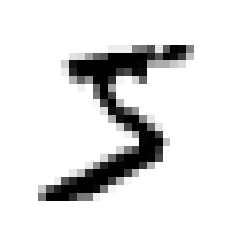

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

random_example = X[0]
random_image = random_example.reshape(28, 28)

plt.imshow(random_image, cmap = mpl.cm.binary)
plt.axis("off")

Check if label is correct

In [8]:
y[0]

'5'

In [ ]:
# Cast to integer
y = y.astype(np.uint8)

# Scale data (values between 0-255 -> map 0-1)
X_scaled = X/255

# reduce size of samples to speed up modelling
# from 70000 image samples, take 10000 training samples and 2000 test samples (data is preshuffled)
X_train, y_train, X_test, y_test = X_scaled[:10000], y[:10000], X_scaled[10000:12000], y[10000:12000]


### Preliminary model evaluation

Test 3 models with default parameters (though increase iterations for logistic regression model)

In [34]:
from sklearn.model_selection import cross_val_score

# train multiclass models
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
cross_val_score(knn_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.96465, 0.96255, 0.9666 ])

In [38]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(max_iter = 5000)
cross_val_score(logit_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.9156 , 0.91755, 0.91965])

#### Optimisation

KNN Classifier has the highest average accuracy value, now we can optimise the hyperparameters using gridsearch.

Warning: this cell will take a long time to run

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_model2 = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model2, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=37.8min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 37.8min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=37.7min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 75.6min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=37.9min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=37.9min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.969, total=37.8min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.969, total=37.9min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.966, total=37.9min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.966, total=37.7min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.967, total=37.9min
[CV] n_neighbors=4, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 1092.8min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)